<a href="https://colab.research.google.com/github/Prerana-J/Machine-learning/blob/main/Copy_of_Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector as selector


In [ ]:
file_path = '/content/ML Project.csv'  # Replace with your file path
data = pd.read_csv(file_path)

In [ ]:
target_column = "Completion Likelihood"
drop_columns = ['Name', 'Email', 'Additional']
features = data.drop(columns=[target_column] + [col for col in drop_columns if col in data.columns])


In [ ]:
label_encoder = LabelEncoder()
data[target_column] = label_encoder.fit_transform(data[target_column].astype(str))

In [ ]:
numerical_features = selector(dtype_include=['int64', 'float64'])(features)
categorical_features = selector(dtype_include='object')(features)


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
        ]), categorical_features)
    ])

In [ ]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features, data[target_column], test_size=0.3, random_state=42)

In [ ]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [ ]:
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print("Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)


Model Accuracy: 0.3333333333333333

Classification Report:
                  precision    recall  f1-score   support

        Neutral       0.27      0.21      0.24        14
Somewhat likely       0.25      0.54      0.34        13
       Unlikely       1.00      0.25      0.40         4
    Very likely       0.47      0.31      0.37        26

       accuracy                           0.33        57
      macro avg       0.50      0.33      0.34        57
   weighted avg       0.41      0.33      0.33        57



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1, 2, 4, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:

# Feature importance visualization
# Extract feature importances and plot
model = pipeline.named_steps['classifier']
feature_names = numerical_features + list(pipeline.named_steps['preprocessor'].transformers_[1][1]['encoder'].get_feature_names_out(categorical_features))
importances = model.feature_importances_


<ipython-input-14-598366806302>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances, y=sorted_feature_names, palette="viridis")
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128578 (\N{SLIGHTLY SMILING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


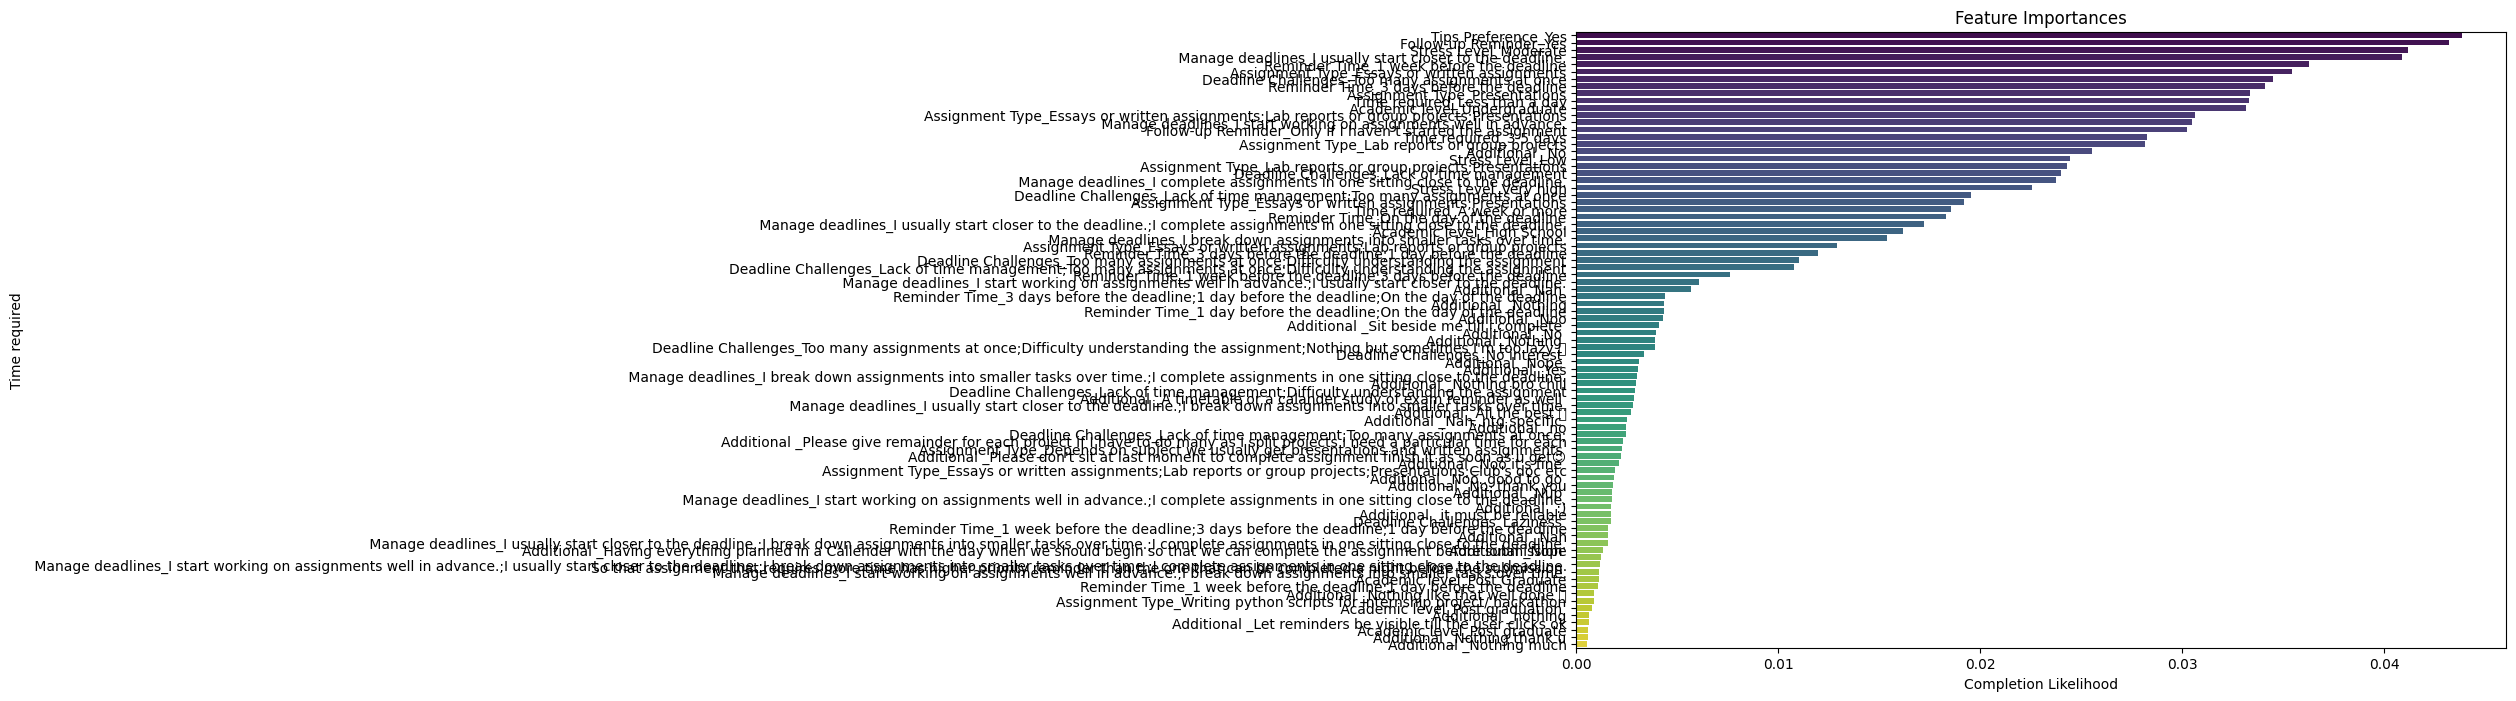

<ipython-input-14-598366806302>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances, y=sorted_feature_names, palette="viridis", legend=False)


<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128578 (\N{SLIGHTLY SMILING FACE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128578 (\N{SLIGHTLY SMILING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


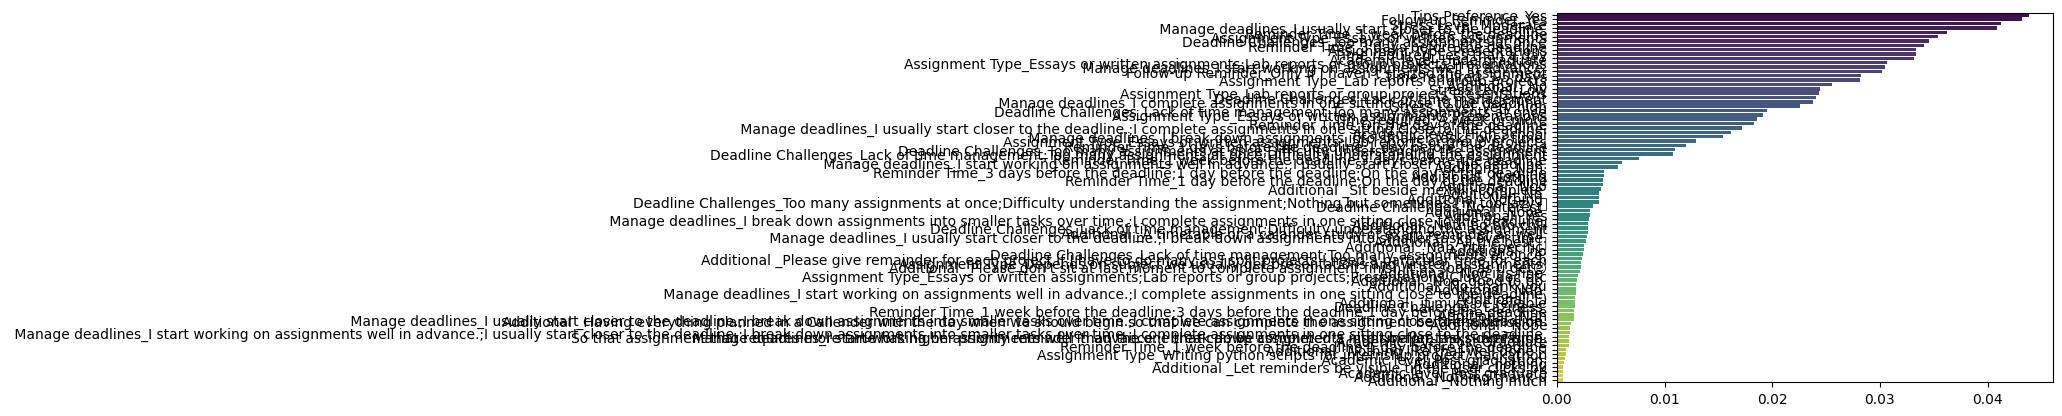

In [ ]:
# Sort feature importances in descending order and visualize
indices = importances.argsort()[::-1]
sorted_feature_names = [feature_names[i] for i in indices]
sorted_importances = importances[indices]

plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_importances, y=sorted_feature_names, palette="viridis")
plt.title('Feature Importances')
plt.xlabel('Completion Likelihood')
plt.ylabel('Time required')
plt.show()
sns.barplot(x=sorted_importances, y=sorted_feature_names, palette="viridis", legend=False)


<ipython-input-17-61df57cf2899>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Completion Likelihood', palette='viridis')


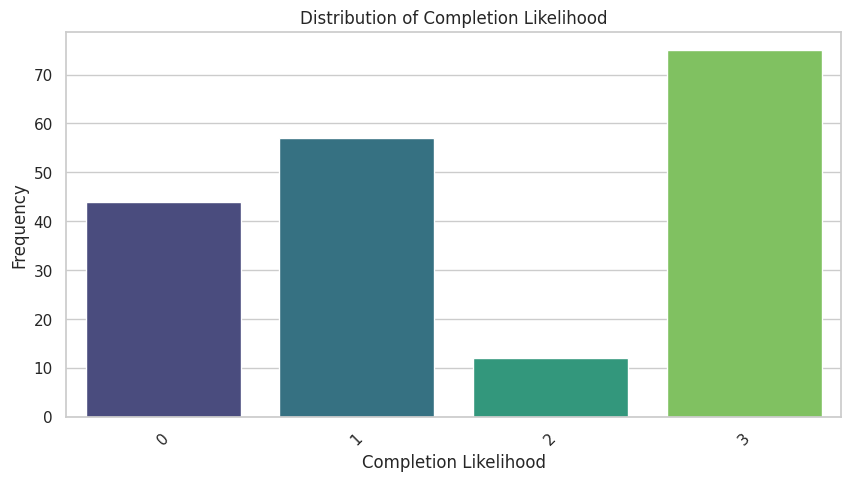

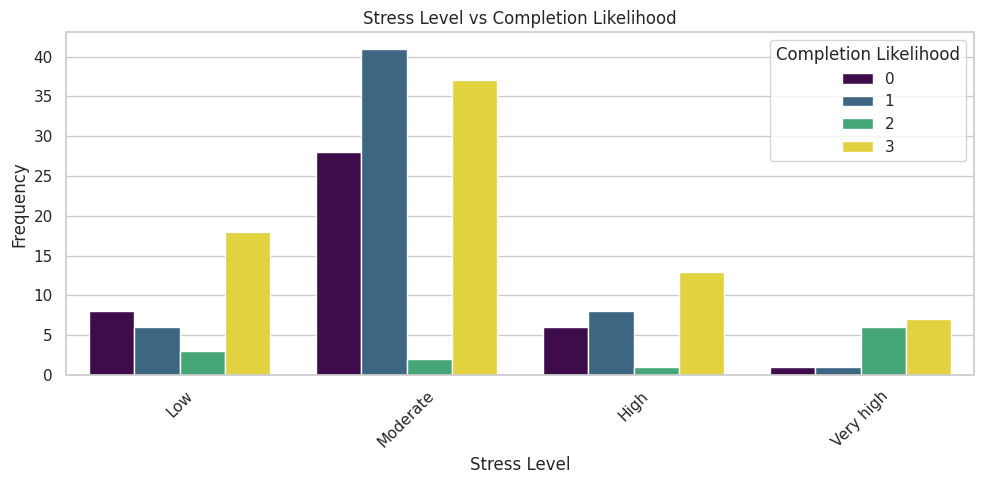

In [ ]:

# Set visualization style
sns.set(style="whitegrid")

# Plot 1: Distribution of Completion Likelihood
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='Completion Likelihood', palette='viridis')
plt.title('Distribution of Completion Likelihood')
plt.xlabel('Completion Likelihood')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Plot 2: Stress Level vs Completion Likelihood
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='Stress Level', hue='Completion Likelihood', palette='viridis')
plt.title('Stress Level vs Completion Likelihood')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


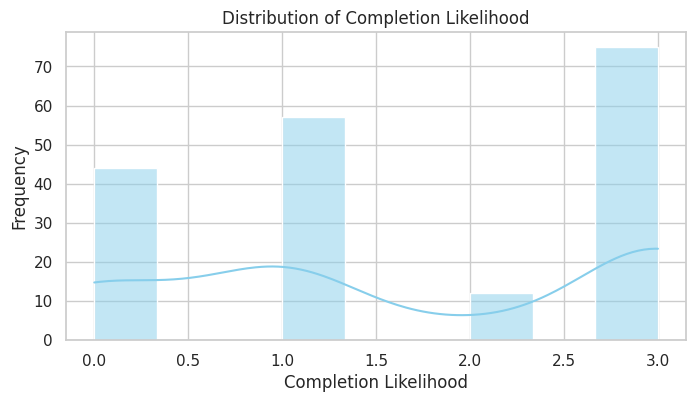

In [ ]:
# 3. Distribution Plots for Numerical Features
for column in numerical_data.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], kde=True, color='skyblue')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

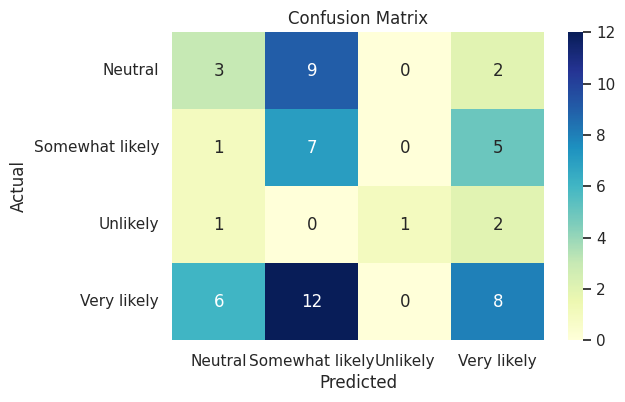

In [ ]:
from sklearn.metrics import confusion_matrix
# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
def evaluate_model(model, model_name):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{model_name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


In [ ]:
# 3. Evaluate K-Nearest Neighbors with optimized k using GridSearchCV
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

param_grid = {'classifier__n_neighbors': range(1, 21)}
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['classifier__n_neighbors']
print(f"Best k value for KNN: {best_k}")

# Evaluate KNN with best k
evaluate_model(KNeighborsClassifier(n_neighbors=best_k), f"K-Nearest Neighbors (k={best_k})")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1, 5, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1, 4, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1, 2, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserW

Best k value for KNN: 18

K-Nearest Neighbors (k=18) Accuracy: 0.33
                 precision    recall  f1-score   support

        Neutral       0.50      0.29      0.36        14
Somewhat likely       0.23      0.54      0.33        13
       Unlikely       0.00      0.00      0.00         4
    Very likely       0.42      0.31      0.36        26

       accuracy                           0.33        57
      macro avg       0.29      0.28      0.26        57
   weighted avg       0.37      0.33      0.33        57



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1, 4, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1, 2, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [4, 5, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarn

In [ ]:
print("Columns in the dataset:", data.columns)

# Encode the target variable for plotting
target_column = "Completion Likelihood"  # Replace with the exact target column name if it's different
drop_columns = ['Name', 'Email', 'Additional']  # Adjust if there are more columns to drop
features = data.drop(columns=[target_column] + [col for col in drop_columns if col in data.columns])

label_encoder = LabelEncoder()
data[target_column] = label_encoder.fit_transform(data[target_column].astype(str))


Columns in the dataset: Index(['Name', 'Email', ' Academic level', ' Manage deadlines',
       'Reminder Time', 'Time required', 'Assignment Type',
       'Deadline Challenges', 'Tips Preference', 'Completion Likelihood',
       'Stress Level', 'Follow-up Reminder', 'Additional '],
      dtype='object')


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
# Remove leading/trailing whitespace from column names
data.columns = data.columns.str.strip()

# Selecting relevant columns
data_filtered = data[["Academic level", "Reminder Time", "Time required",
                      "Assignment Type", "Deadline Challenges",
                      "Completion Likelihood", "Stress Level"]].copy()
# Label Encoding for categorical features
label_encoders = {}
for column in data_filtered.columns:
    if data_filtered[column].dtype == 'object':
        le = LabelEncoder()
        data_filtered[column] = le.fit_transform(data_filtered[column].astype(str))
        label_encoders[column] = le

# Split data into features and target
X = data_filtered.drop("Completion Likelihood", axis=1)
y = data_filtered["Completion Likelihood"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize AdaBoost Classifier
model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.34


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


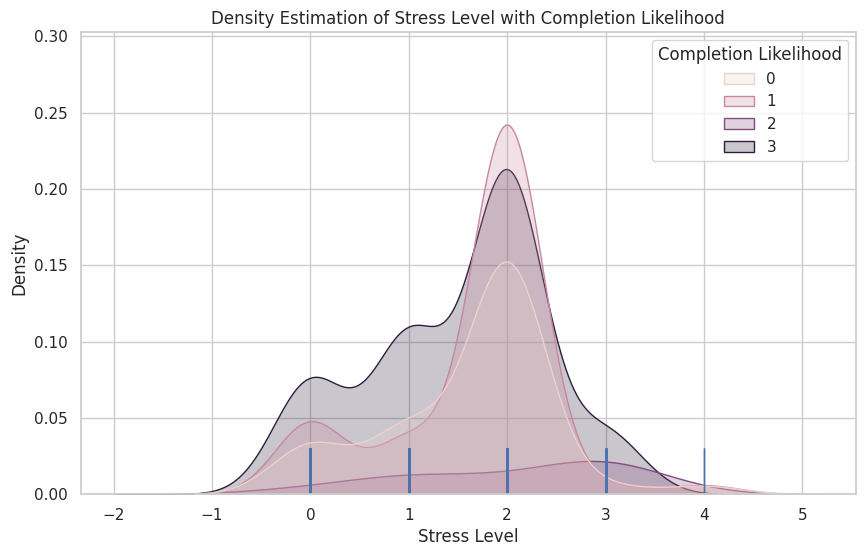

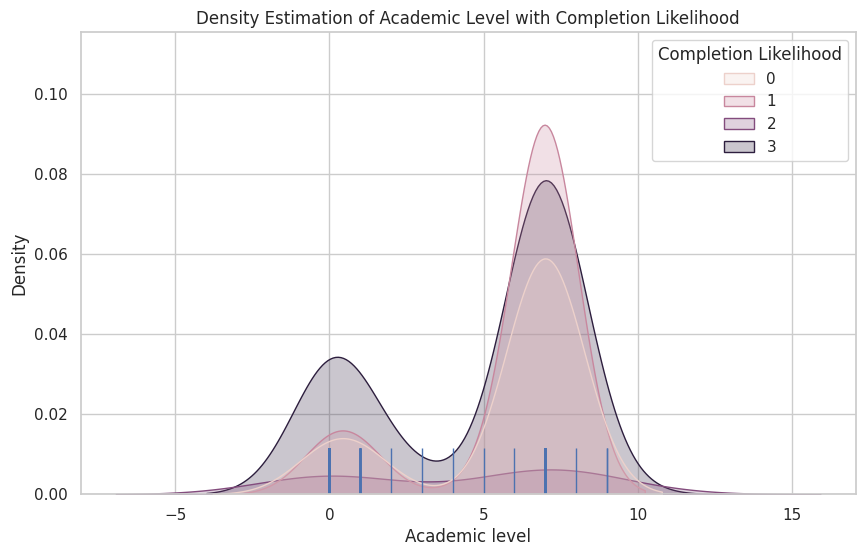

In [ ]:
# Density plot with rug for "Stress Level"
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data_filtered, x="Stress Level", hue="Completion Likelihood", fill=True)
sns.rugplot(data=data_filtered, x="Stress Level", height=0.1)
plt.title("Density Estimation of Stress Level with Completion Likelihood")
plt.show()

# Density plot with rug for "Academic level"
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data_filtered, x="Academic level", hue="Completion Likelihood", fill=True)
sns.rugplot(data=data_filtered, x="Academic level", height=0.1)
plt.title("Density Estimation of Academic Level with Completion Likelihood")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
data.columns = data.columns.str.strip()

# Selecting relevant columns for modeling
data_filtered = data[["Academic level", "Reminder Time", "Time required",
                      "Assignment Type", "Deadline Challenges",
                      "Completion Likelihood", "Stress Level"]].copy()


In [ ]:
# Label Encoding for categorical features
label_encoders = {}
for column in data_filtered.columns:
    if data_filtered[column].dtype == 'object':
        le = LabelEncoder()
        data_filtered[column] = le.fit_transform(data_filtered[column].astype(str))
        label_encoders[column] = le

# Split data into features (X) and target (y)
X = data_filtered.drop("Completion Likelihood", axis=1)
y = data_filtered["Completion Likelihood"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

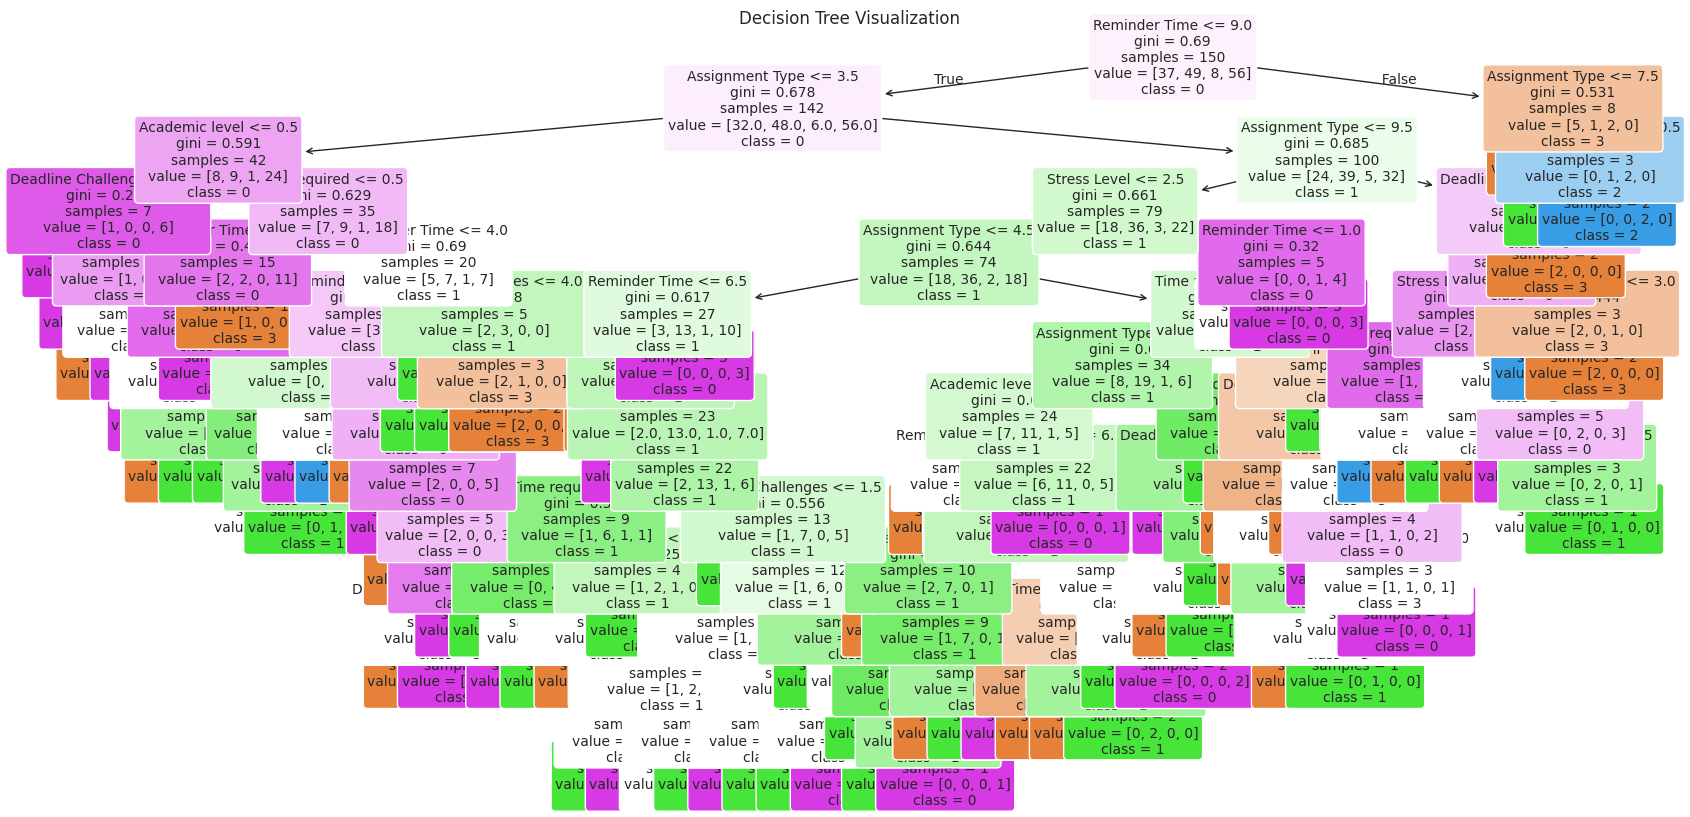

In [ ]:
# Visualize the Decision Tree
plt.figure(figsize=(20, 10))  # Increase size for readability
# Get unique class names from the target variable (y)
class_names = [str(cls) for cls in y.unique()]
plot_tree(
    model,
    feature_names=X.columns,
    class_names=class_names,  # Use the extracted class names
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()

In [ ]:
# Initialize Decision Tree Classifier with pruning parameters
model = DecisionTreeClassifier(
    random_state=42,
    max_depth=3,            # Limit the maximum depth of the tree
    min_samples_split=10,   # Minimum samples required to split an internal node
    min_samples_leaf=5      # Minimum samples required to be at a leaf node
)


In [ ]:
# Train the model
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

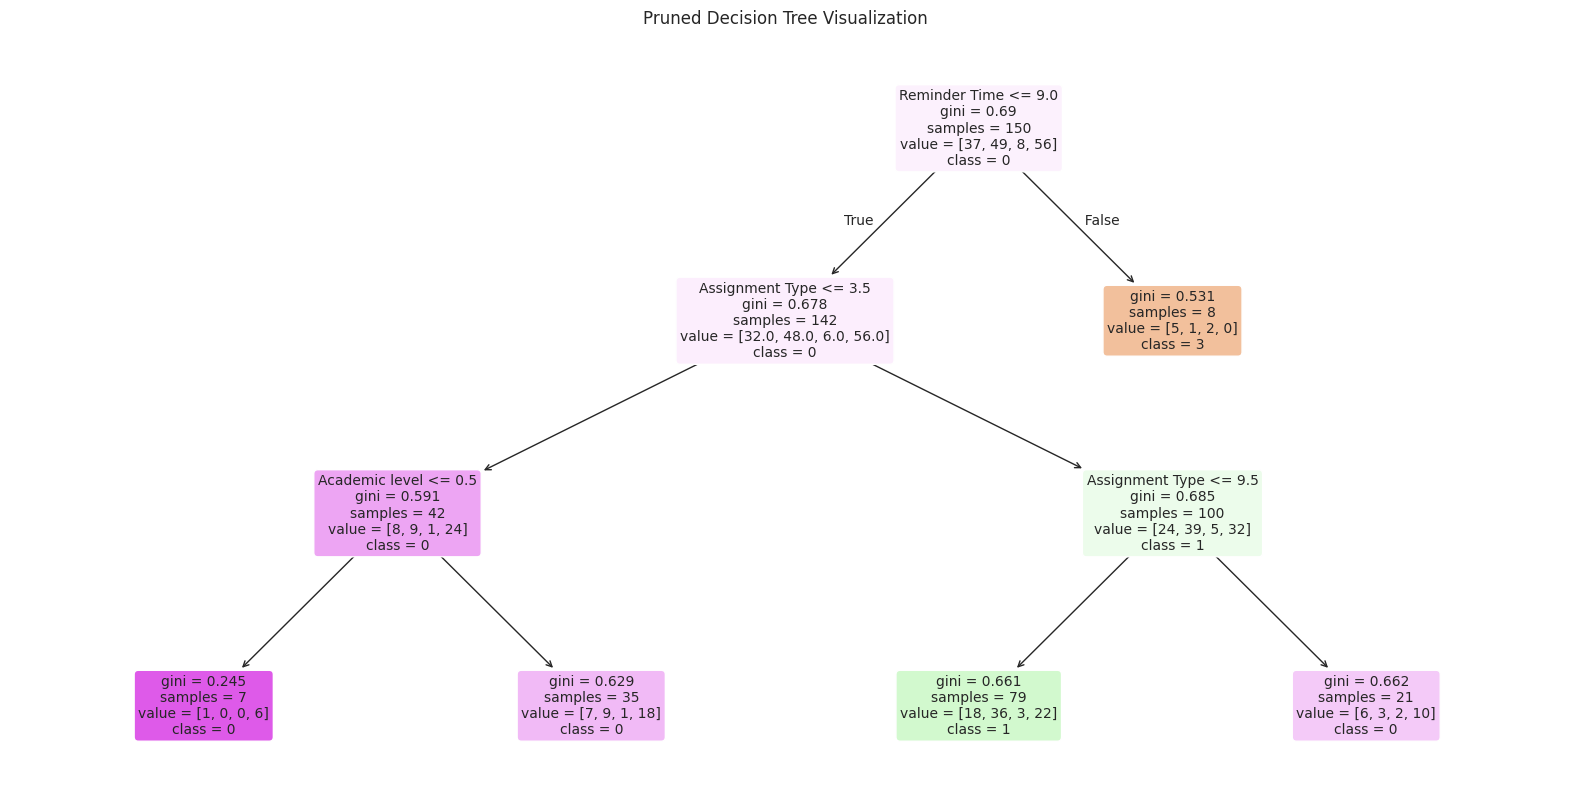

In [ ]:
# Visualize the pruned Decision Tree
plt.figure(figsize=(20, 10))
# Get unique class names from the target variable (y)
class_names = [str(cls) for cls in y.unique()]
plot_tree(
    model,
    feature_names=X.columns,
    class_names=class_names,  # Use the extracted class names
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Pruned Decision Tree Visualization")
plt.show()

In [ ]:

# Convert "Completion Likelihood" and "Stress Level" to categorical if they are not already
data['Completion Likelihood'] = data['Completion Likelihood'].astype('category')
data['Stress Level'] = data['Stress Level'].astype('category')

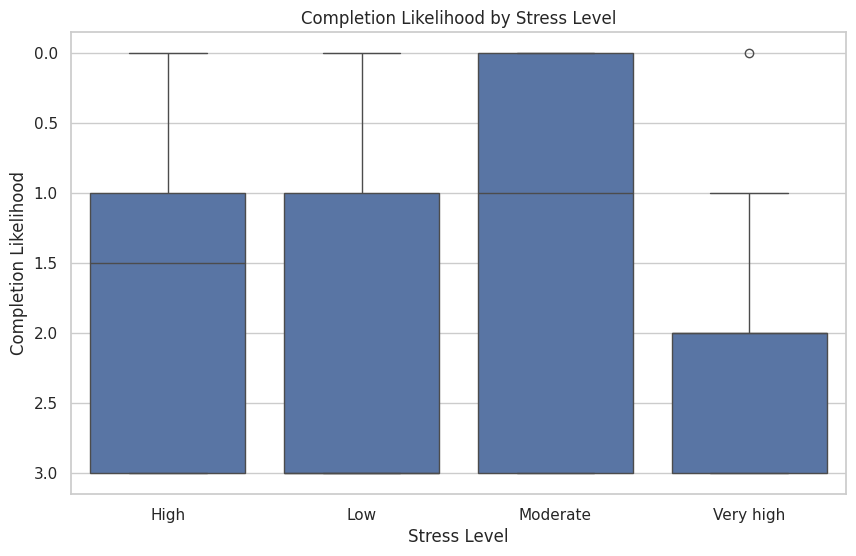

In [ ]:
# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Stress Level", y="Completion Likelihood", data=data)
plt.title("Completion Likelihood by Stress Level")
plt.show()

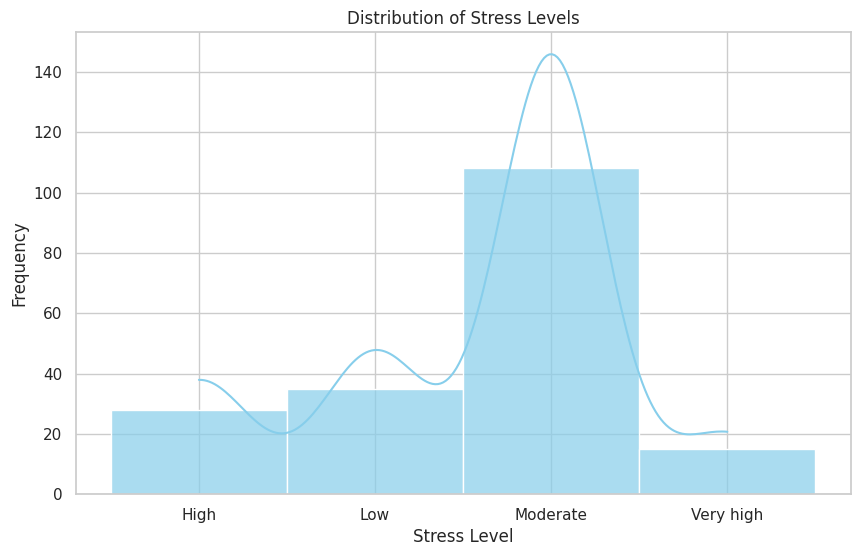

In [ ]:
stress_data = data['Stress Level'].dropna()

# Set up the plot
plt.figure(figsize=(10, 6))
sns.histplot(stress_data, kde=True, color="skyblue", alpha=0.7)
plt.title("Distribution of Stress Levels")
plt.xlabel("Stress Level")
plt.ylabel("Frequency")
plt.show()

In [ ]:
stress_level_map = {"Low": 1, "Moderate": 2, "High": 3, "Very high": 4}
completion_likelihood_map = {
    "Very likely": 4, "Somewhat likely": 3, "Unlikely": 2, "Very unlikely": 1
}


In [ ]:
# Apply mappings to create numeric columns
data['Stress_Level_Numeric'] = data['Stress Level'].map(stress_level_map)
data['Completion_Likelihood_Numeric'] = data['Completion Likelihood'].map(completion_likelihood_map)

In [ ]:
# Drop rows with NaN values in either of these columns
scatter_data = data.dropna(subset=['Stress_Level_Numeric', 'Completion_Likelihood_Numeric'])
